<a href="https://colab.research.google.com/github/relifeted/Adobe-Export-Scripts/blob/master/videocr_PaddleOCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Check environment

In [2]:
!python --version

Python 3.11.13


If you want to use GPU acceleration, click in the right lower corner on the Runtime options > Change runtime type, and make sure "Hardware accelerator" is set to the GPU. You can verify the new Runtime with the following two commands:

In [3]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0


In [4]:
!nvidia-smi

Wed Jun 18 23:45:16 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**videocr** depends on Baidu's PaddlePaddle and PaddleOCR projects. Setup process for PaddlePaddle may vary depending on the environment. See https://www.paddlepaddle.org.cn/en/install/quick?docurl=/documentation/docs/en/install/pip/linux-pip_en.html

# Setup PaddlePaddle

You can decide between installing the CPU or GPU version:

## CPU version:

In [5]:
!pip install paddlepaddle==3.0.0 -i https://www.paddlepaddle.org.cn/packages/stable/cpu/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cpu/
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 377, in run
    requirement_set = resolver.resolve(
                      ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 95, in resolve
    result = self._result = resolver.resolve(
                            ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 546, in resolve
    sta

KeyboardInterrupt: 

## GPU version:

In [ ]:
!pip install paddlepaddle-gpu==3.0.0 -i https://www.paddlepaddle.org.cn/packages/stable/cu118/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cu118/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.9/699.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Install videocr

In [ ]:
!pip install git+https://github.com/oliverfei/videocr-PaddleOCR.git

# Upload or download file to extract subtitles from or connect Google Drive

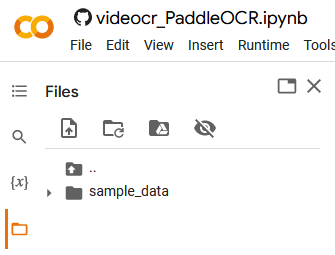

# Run videocr

# IMPORTANT
Set the `language_code` to the correct value. See https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.6/doc/doc_en/multi_languages_en.md#5-support-languages-and-abbreviations for list of languages and their abbreviations

Check `use_gpu` if using GPU

Adjust `crop_x`, `crop_y`, `crop_width`, and `crop_height` bounding area to fit the subtitles in your video. `crop_x` and `crop_y` correspond to the top left corner of the bounding area where `x=0` is at the left most edge of the video frame and `y=0` is at the top most edge of the video frame. See example below: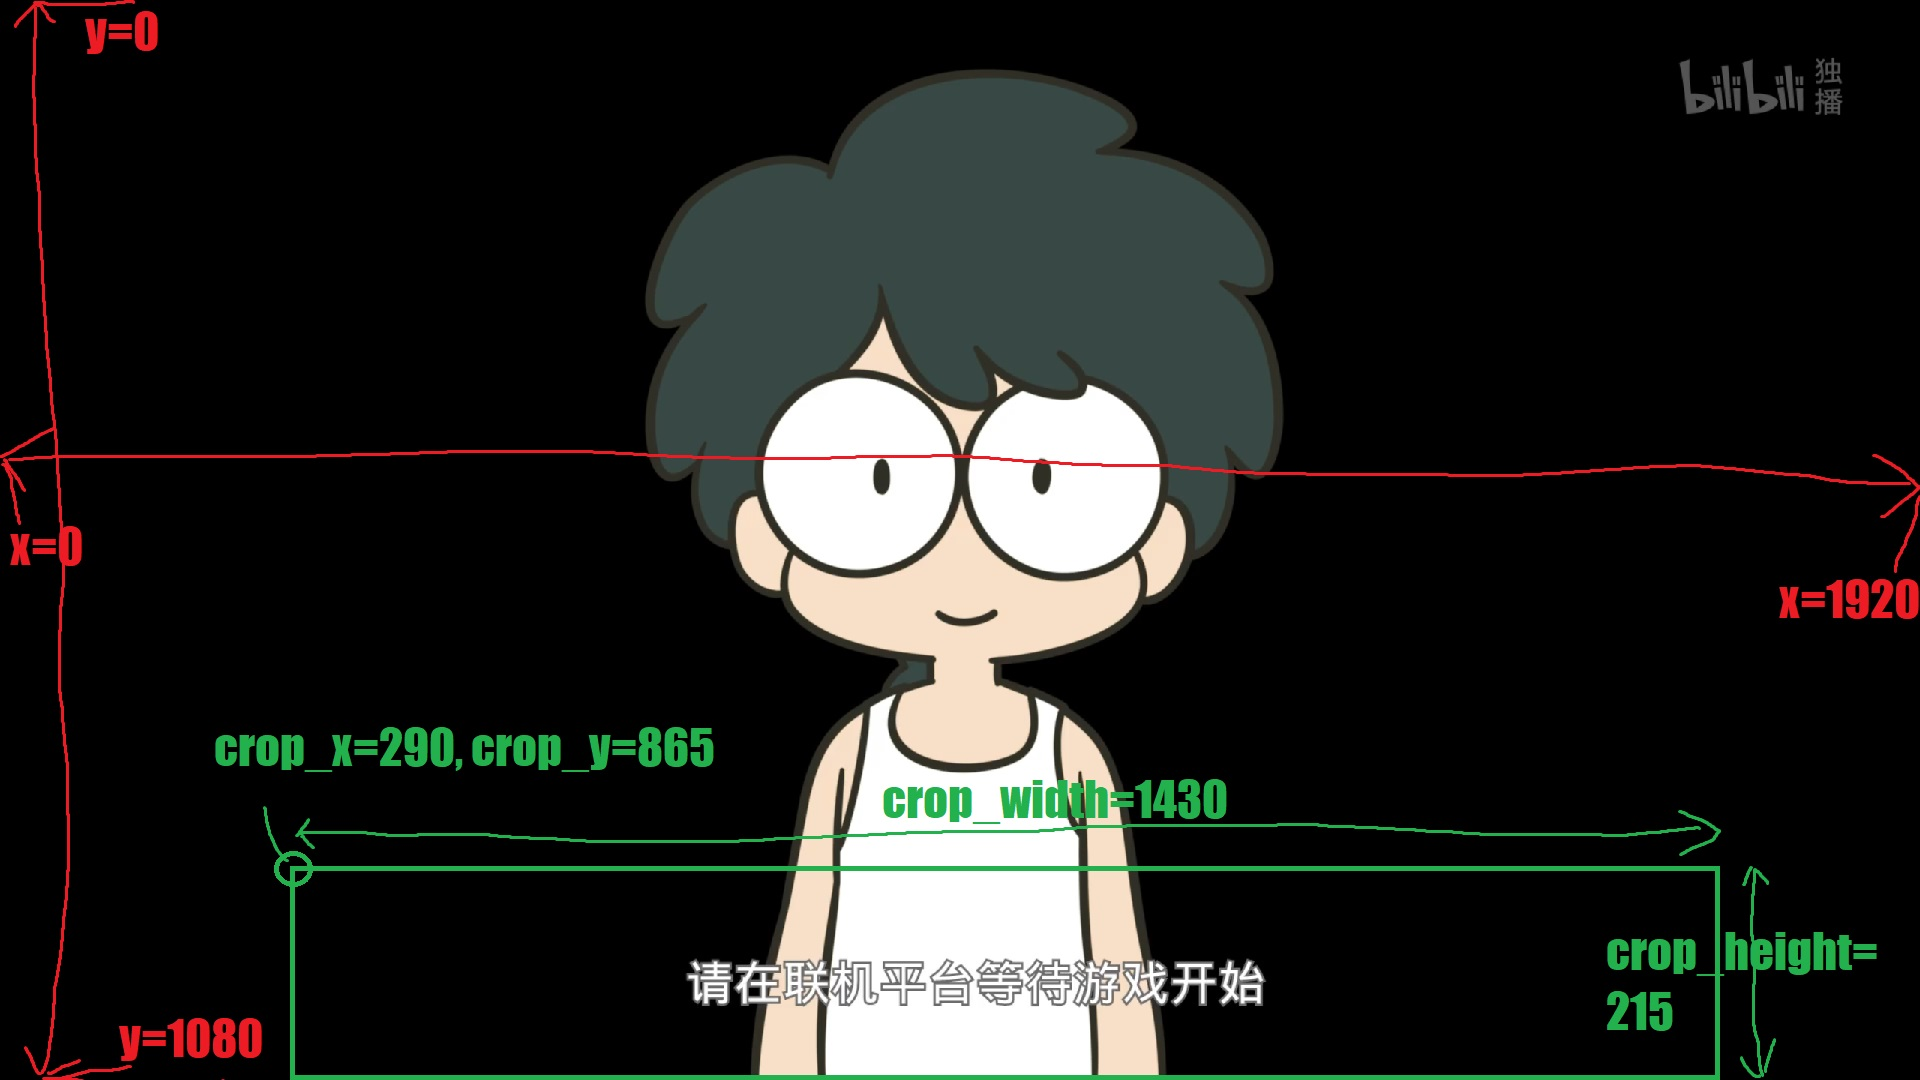

In [ ]:
from videocr import save_subtitles_to_file

#@title OCR parameters
input_file_path = "/content/drive/MyDrive/Share/Thought Verification Zone - The Community/clean/S01E01.mp4" #@param {type:"string"}
output_file_path = "/content/drive/MyDrive/Share/Thought Verification Zone - The Community/clean/S01E01.kor.srt" #@param {type:"string"}
language_code = "ko" #@param {type:"string"}
use_gpu = True #@param {type:"boolean"}
start_time = "00:00" #@param {type:"string"}
end_time = "" #@param {type:"string"}
confidence_threshold = 75 #@param {type:"number"}
similarity_threshold = 80 #@param {type:"number"}
frames_to_skip = 0 #@param {type:"integer"}
crop_x = 122 #@param {type:"integer"}
crop_y = 7 #@param {type:"integer"}
crop_width = 905 #@param {type:"integer"}
crop_height = 69 #@param {type:"integer"}

save_subtitles_to_file(input_file_path, output_file_path, lang=language_code,
                       time_start=start_time, time_end=end_time,
                       conf_threshold=confidence_threshold, sim_threshold=similarity_threshold,
                       use_gpu=use_gpu,
                       # # Models different from the default mobile models can be downloaded here: https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.3/doc/doc_en/models_list_en.md
                       # det_model_dir='<PADDLEOCR DETECTION MODEL DIR>', rec_model_dir='<PADDLEOCR RECOGNITION MODEL DIR>',
                       # brightness_threshold=210, similar_image_threshold=1000 # filters might help
                       # use_fullframe=True, # note: videocr just assumes horizontal lines of text. vertical text scenario hasn't been implemented yet
                       frames_to_skip=frames_to_skip, # can skip inference for some frames to speed up the process
                       crop_x=crop_x, crop_y=crop_y, crop_width=crop_width, crop_height=crop_height)

In [ ]:
with open(output_file_path, 'r') as f:
  print(f.read())